# Sodium Voltage-gated Channel, Alpha Subunit 2 (SCN2A) and Associated Syndrome

[Sodium Voltage-gated Channel, Alpha Subunit 2 (SCN2A)](https://www.omim.org/entry/182390) is a gene that encodes the voltage-gated sodium channel Na(v)1.2. This effects the initiation and conduction of action potentials in unmyelinated axons. 

There are three known syndromes associated with pathogenic variants on SCN2A, two of which are included in this analysis. 

[Developmental and epileptic encephalopathy 11](https://www.omim.org/entry/613721) is an autosomal dominant disease, with onset in infancy. It is characterized by seizures, developmental delay, status epilepticus, abnormal movements, autistic features, and many other neurological phenotypes, microcephaly, and oculogyric crises. The severity of this disease varies significantly among individuals. 

[Seizures, benign familial infantile, 3](https://www.omim.org/entry/607745) is an autosomal dominant disease, with onset within 7 months of birth. It is characterized by seizures, apnea during seizures, staring episodes during seizures, and cyanosis. 

<!-- Summarize key findings from previous studies on genotype-phenotype correlations in the syndrome. -->

Several previous publications have reported candidate genotype-phenotype correlations for variants on SCN2A.

<!-- Cite specific studies and their findings. Replace with relevant studies and findings for the specific gene and syndrome. -->

[Reynolds et al. (2020)](https://www.sciencedirect.com/science/article/pii/S1090379819304362) stated that:

> "There are two recurrent variants identified in this cohort [individuals with neonatal seizures and later onset episodic ataxia], p.Ala263Val and p.Arg1882Gly."

> "Missense variants in SCN2A, causing a GOF are identified in cohorts with BFNIS (Benign familial neonatal-infantile seizures) and DEE (Developmental and epileptic encephalopathies) onset <3 months."

[Wolff et al. (2020)](https://onlinelibrary.wiley.com/doi/full/10.1111/epi.14935) stated that:

> "The R853Q (S4 domain 2) variant was found in patients often presenting with West syndrome, severe intellectual disability, intractable seizures, and choreoathetosis."

> "SCN2A variants in the subgroup of ID/ASD are mainly truncating (75%), with missense variants occurring in 25%."


Therefore, we tested missense vs other variants, p.Arg853Gln vs all others, those in domain 2 vs anywhere else, and p.Ala263Val & p.Arg1882Gly vs all others. 

# Imports 

In [1]:
import hpotk
import gpsea

from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")


Loaded HPO v2024-08-13
Using gpsea version 0.4.2.dev0


# Loading Phenopackets & Gene Variant Data

## Choose the preferred transcript and protein sequence

The prefered transcript can be found by searching on the gene symbol in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/). By entering the accession number in [NCBI Nucleotide](https://www.ncbi.nlm.nih.gov/nuccore/?), you can find the corresponding protein accession number.


<span style='color: red'>IMPORTANT - gene symbol, mane TX accession, as well as the corresponding protein identifier should be tailored to your analysis!</span>

Here we use *WWOX* as an example:

In [6]:
gene_symbol = 'SCN2A'
mane_tx_id = 'NM_021007.3'
mane_protein_id = 'NP_066287.2'

## Load phenopackets

Load phenopackets from Phenopacket Store:

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.19'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets')

Loaded 393 phenopackets


If Phenopacket Store is not an option, there are also other ways to load phenopackets.
Consult the [Input data](https://monarch-initiative.github.io/gpsea/stable/user-guide/input-data.html) section of the user guide.

## Create cohort

Transform the phenopackets into a cohort and perform Q/C:

In [4]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')

Individuals Processed: 100%|██████████| 393/393 [09:19<00:00,  1.42s/individuals]
Loaded 393 individuals


## Show Q/C issues (if any)

Test if there are any issues:

In [7]:
qc.summarize()

Validated under permissive policy
No errors or warnings were found


# Explore cohort

Generate reports to simplify exploring the cohort.

## Cohort summary

In [9]:
from gpsea.view import CohortViewable

cv = CohortViewable(hpo)
report = cv.process(cohort, transcript_id=mane_tx_id)
display(report)

HPO Term,ID,Seen in n individuals
Epileptic encephalopathy,HP:0200134,127
"Intellectual disability, severe",HP:0010864,97
Autism,HP:0000717,92
Bilateral tonic-clonic seizure,HP:0002069,86
Global developmental delay,HP:0001263,84
Seizure,HP:0001250,74
Multifocal epileptiform discharges,HP:0010841,74
Generalized tonic seizure,HP:0010818,72
Hypotonia,HP:0001252,69
Infantile spasms,HP:0012469,64


## Protein sequence effects

Summarize effects on the protein sequence

In [17]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVariantViewer


pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
html_prot = viewer.process(cohort)
display(html_prot)

Name,Type,Coordinates,Count,Variants
Disordered,REGION,28 - 61,3,p.Arg36Gly
I,REPEAT,111 - 456,87,p.Val423Leu; p.Trp281Ter; p.Thr365Met; p.Glu430Gln; p.Gln383Glu; p.Val213Ala; p.Leu421Val; p.Ala202Val; p.Ile237Asn; p.Arg395Pro; p.Val424Met; p.Arg223Gln; p.Ala263Thr; p.Thr227Ile; p.Asn132Lys; p.Phe207Ser; p.Val208Glu; p.Phe328Val; p.Val251Ala; p.Asp343Gly; p.Arg188Trp; p.Glu438Asp; p.Thr393Lys; p.Val251Ile; p.Met252Val; p.Met136Ile; p.Glu430Gly; p.Ala240Ser; p.Leu436Ser; p.Thr185Ile; p.Glu440ArgfsTer20; p.Glu430Ala; p.Ala263Val; p.Arg220Gly; p.Thr236Ser; p.Thr218Lys; p.Ile172Val; p.Glu169Gly; p.Trp191Cys; p.Glu169Ter; p.Arg275Ter; p.Thr400Arg; p.Val424Leu; p.Ala439Ter; p.Val213Asp; p.Asn212Asp; p.Arg379His; p.Trp191Gly; p.Tyr428Cys; p.Phe262Ser; p.Ser214Pro; p.Asp195Gly; p.Val261Met; p.Gly211Asp; p.Leu216Trp; p.Leu248Pro
Disordered,REGION,494 - 529,4,p.Leu501Ter; p.Arg524Ter; p.Asn503LysfsTer19
Disordered,REGION,590 - 610,2,p.Asp609Ter; p.Leu611ValfsTer35
II,REPEAT,741 - 1013,85,p.Arg853Gln; p.Arg856Gln; p.Lys905Gln; p.Leu1003Ile; p.Arg856Ter; p.Phe928Cys; p.Glu999Val; p.Ile891Thr; p.Gly1013Ter; p.Asp997Tyr; p.Ile874MetfsTer5; p.Thr784CysfsTer45; p.Asn1001Lys; p.Ile873Met; p.Leu835Phe; p.Arg922Cys; p.Ser863Phe; p.His930Gln; p.Ser987Ile; p.Ile769Thr; p.Arg937His; p.Glu999Lys; p.Gly822Ser; p.Val892Ile; p.Ile890Met; p.Gly828Val; p.Asn876Thr; p.Ala1006Val; p.Ala896Val; p.Cys959Ter; p.Gly899Ser; p.Gly882Glu; p.Arg856Leu; p.Phe978Leu; p.Arg937Cys; p.Thr773Ile; p.Asn976Lys; p.Lys908Glu; p.Lys905Asn; p.Val887Ala; p.Gly882Arg; p.Leu881Pro; p.Arg850Pro; p.Leu884His; p.Gln901Glu; p.Phe895Ser; p.Leu983Trp
Binds SCN2B,REGION,917 - 918,0,
Disordered,REGION,1120 - 1165,2,p.Glu1133Asp; p.Met1128Thr
III,REPEAT,1190 - 1504,73,p.Gly1460Arg; p.Asp1487Glu; p.Met1323Val; p.Thr1464Ala; p.Glu1211Lys; p.Ile1473Met; p.Ile1353Met; p.Gly1470Ala; p.Val1282Phe; p.Arg1319Pro; p.Ile1455Asn; p.Ala1500Thr; p.Cys1344Tyr; p.Val1325Phe; p.Arg1312Thr; p.Lys1422Glu; p.Arg1319Leu; p.Trp1398Ter; p.Val1326Leu; p.Ile1488Asn; p.Lys1495Glu; p.Leu1342Pro; p.Leu1341Arg; p.Gln1479Pro; p.Val1326Asp; p.Met1501Val; p.Leu1416Phe; p.Lys1362Met; p.Glu1321Lys; p.Ala1333Thr; p.Arg1319Trp; p.Ile1252Val; p.Leu1330Phe; p.Trp1348Ter; p.Val1325Ile; p.Arg1319Gln; p.Arg1235Ter; p.Ser1336Tyr; p.Trp1276Ter; p.Gly1223Arg; p.Glu1493del; p.Arg1435Ter; p.Ala1316Val; p.Cys1386Arg; p.Ser1318Pro; p.Leu1341Ile; p.Thr1420Met; p.Lys1387SerfsTer4; p.Met1338Thr
IV,REPEAT,1513 - 1811,78,p.Gln1521Ter; p.Met1548Val; p.Tyr1771His; p.Gly1634Val; p.Ala1773Val; p.Ala1773Thr; p.Leu1665Phe; p.Met1548Thr; p.Ile1636Met; p.Arg1632Lys; p.Ile1640Asn; p.Leu1563Val; p.Leu1660Trp; p.Ala1652Pro; p.Ser1584Cys; p.Ile1615ArgfsTer47; p.Leu1614Pro; p.Phe1682Ser; p.Tyr1589Cys; p.Gly1744Glu; p.Lys1641Asn; p.Ile1596Ser; p.Phe1597Leu; p.Met1770Leu; p.Phe1651Cys; p.Glu1803Gly; p.Pro1622Ser; p.Gln1531Lys; p.Arg1626Gln; p.Gly1744Arg; p.Arg1629His; p.Gly1634Asp; p.Ser1758Arg; p.Arg1515Ter; p.Ile1571Thr; p.Asp1598Gly; p.Ser1656Pro; p.Val1607Ala; p.Ile1640Phe; p.Gly1593Arg; p.Trp1716Ter; p.Ile1640Ser; p.Ala1612Gly; p.Met1545Val; p.Met1797IlefsTer5; p.Gln1811Glu; p.Arg1629Leu; p.Trp1594Arg; p.Met1545Ile; p.Thr1623Asn; p.Met1654Ile; p.Gly1522Ala; p.Val1627Met; p.Ser1656Phe; p.Ser1536Arg; p.Arg1635Gln; p.Ile1537_Met1538delinsSerIle; p.Ile1772Met; p.Leu1650Pro; p.Leu1765Pro
IQ,DOMAIN,1905 - 1934,3,p.Arg1918His; p.Lys1933Met


Plot variant distribution with respect to the protein sequence, domains, and other features

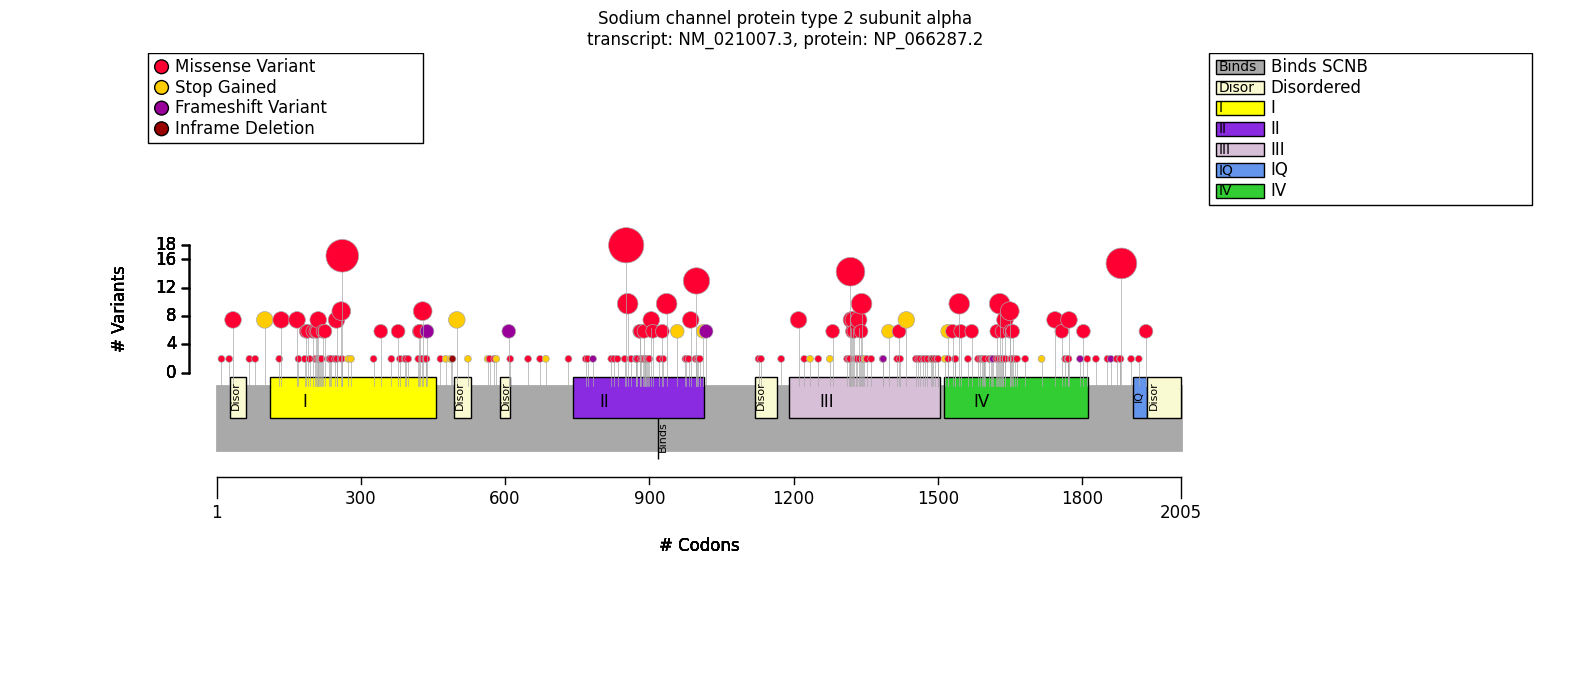

In [18]:
from gpsea.view import ProteinVisualizer

drawer = ProteinVisualizer()
_ = drawer.draw_fig(pvis=pvis)

## Allele report

In [19]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
report = viewer.process(cohort)
display(report)

Variant key,Variant (cDNA),Variant (protein),Overlapped Exons,Effects,Count
2_165342465_165342465_G_A,c.2558G>A,p.Arg853Gln,15,missense,18
2_165310413_165310413_C_T,c.788C>T,p.Ala263Val,7,missense,14
2_165389451_165389451_G_A,c.5645G>A,p.Arg1882Gln,27,missense,10
2_165354267_165354267_G_A,c.2995G>A,p.Glu999Lys,17,missense,8
2_165373331_165373331_G_A,c.3956G>A,p.Arg1319Gln,21,missense,5
2_165374737_165374737_T_C,c.4025T>C,p.Leu1342Pro,22,missense,5
2_165310406_165310406_G_A,c.781G>A,p.Val261Met,7,missense,4
2_165388692_165388692_G_A,c.4886G>A,p.Arg1629His,27,missense,4
2_165388755_165388755_T_C,c.4949T>C,p.Leu1650Pro,27,missense,4
2_165386827_165386827_A_G,c.4633A>G,p.Met1545Val,26,missense,4


# Configure genotype phenotype analysis

## Genotype predicate

Test Missense variants vs. the others.

<span style='color: red'>IMPORTANT - genotype predicate should be tailored to your analysis!</span>

In [20]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, autosomal_dominant

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
gt_predicate = autosomal_dominant(is_missense)

## Phenotype predicate

In [21]:
from gpsea.model import FeatureType
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

## MTC filter, MTC correction, and statistic

In [22]:
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

## Assemble the analysis

In [23]:
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

# Execute the analysis

In [24]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

## Show MTC report

In [27]:
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
report = viewer.process(result)
display(report)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,107
HMF02,Skipping term because no genotype has more than one observed HPO count,3
HMF03,Skipping term because of a child term with the same individual counts,3
HMF04,Skipping term because all genotypes have same HPO observed proportions,49
HMF05,Skipping term because one genotype had zero observations,14
HMF06,Skipping term with less than 7 observations (not powered for 2x2),104
HMF08,Skipping general term,72


## Summarize the HPO terms

In [31]:
from gpsea.view import summarize_hpo_analysis

report = summarize_hpo_analysis(hpo=hpo, result=result)
report.head(30)

What is the genotype group                         No allele          \
                                                       Count Percent   
Motor seizure [HP:0020219]                              6/31     19%   
Epileptic spasm [HP:0011097]                            0/25      0%   
Infantile spasms [HP:0012469]                           0/25      0%   
Focal-onset seizure [HP:0007359]                        8/33     24%   
Seizure [HP:0001250]                                   28/53     53%   
Generalized-onset motor seizure [HP:0032677]            3/28     11%   
Tonic seizure [HP:0032792]                              4/29     14%   
Generalized-onset seizure [HP:0002197]                  6/31     19%   
Generalized tonic seizure [HP:0010818]                  3/28     11%   
Focal motor seizure [HP:0011153]                        3/28     11%   
Focal tonic seizure [HP:0011167]                        1/26      4%   
Bilateral tonic-clonic seizure [HP:0002069]            10/35     29%   
Intellectual disability, moderate [HP:0002342]         10/10    100%   
Myoclonic seizure [HP:0032794]                          1/26      4%   
Generalized myoclonic seizure [HP:0002123]              1/26      4%   
Autism [HP:0000717]                                    33/43     77%   
Delayed speech and language development [HP:000...     12/12    100%   
Dialeptic seizure [HP:0011146]                          3/28     11%   
Non-motor seizure [HP:0033259]                          3/28     11%   
Intellectual disability [HP:0001249]                   34/34    100%   
Neurodevelopmental delay [HP:0012758]                  22/22    100%   
Focal impaired awareness seizure [HP:0002384]           0/25      0%   
Neurodevelopmental abnormality [HP:0012759]            45/45    100%   
Global developmental delay [HP:0001263]                19/19    100%   
Generalized non-motor (absence) seizure [HP:000...      3/28     11%   
Focal clonic seizure [HP:0002266]                       2/27      7%   
Absent speech [HP:0001344]                               5/6     83%   
Focal non-motor seizure [HP:0032679]                    0/25      0%   
Developmental regression [HP:0002376]                    5/5    100%   
Febrile seizure (within the age range of 3 mont...      1/26      4%   

What is the genotype group                         Monoallelic          \
                                                         Count Percent   
Motor seizure [HP:0020219]                             146/175     83%   
Epileptic spasm [HP:0011097]                             67/96     70%   
Infantile spasms [HP:0012469]                            64/93     69%   
Focal-onset seizure [HP:0007359]                       141/170     83%   
Seizure [HP:0001250]                                   298/327     91%   
Generalized-onset motor seizure [HP:0032677]            87/116     75%   
Tonic seizure [HP:0032792]                              94/123     76%   
Generalized-onset seizure [HP:0002197]                 104/133     78%   
Generalized tonic seizure [HP:0010818]                   69/98     70%   
Focal motor seizure [HP:0011153]                         63/92     68%   
Focal tonic seizure [HP:0011167]                         46/75     61%   
Bilateral tonic-clonic seizure [HP:0002069]             82/111     74%   
Intellectual disability, moderate [HP:0002342]           17/71     24%   
Myoclonic seizure [HP:0032794]                           32/61     52%   
Generalized myoclonic seizure [HP:0002123]               29/58     50%   
Autism [HP:0000717]                                     59/146     40%   
Delayed speech and language development [HP:000...       23/60     38%   
Dialeptic seizure [HP:0011146]                           34/63     54%   
Non-motor seizure [HP:0033259]                           34/63     54%   
Intellectual disability [HP:0001249]                   144/198     73%   
Neurodevelopmental delay [HP:0012758]                   87/124     

In [32]:
from gpsea.analysis.predicate.genotype import ProteinPredicates

prot_pred = ProteinPredicates(pms)
is_in_two = prot_pred.protein_feature("II", mane_tx_id)
gt_two_predicate = autosomal_dominant(is_in_two)

In [33]:
result_two = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_two_predicate,
    pheno_predicates=pheno_predicates,
)

In [34]:
report_two = summarize_hpo_analysis(hpo=hpo, result=result_two)
report_two.head(30)

What is the genotype group                         No allele          \
                                                       Count Percent   
Hypsarrhythmia [HP:0002521]                            29/59     49%   
Focal hemiclonic seizure [HP:0006813]                   1/43      2%   
Intellectual disability, severe [HP:0010864]          67/114     59%   
EEG with generalized epileptiform discharges [H...    90/120     75%   
EEG abnormality [HP:0002353]                         146/175     83%   
Interictal epileptiform activity [HP:0011182]        138/168     82%   
Interictal EEG abnormality [HP:0025373]              139/168     83%   
Multifocal epileptiform discharges [HP:0010841]        56/86     65%   
EEG with occipital epileptiform discharges [HP:...      2/32      6%   
Intellectual disability [HP:0001249]                 134/181     74%   
EEG with burst suppression [HP:0010851]                44/74     59%   
EEG with focal epileptiform discharges [HP:0011...    93/123     76%   
Hypertonia [HP:0001276]                                34/73     47%   
Oculogyric crisis [HP:0010553]                           1/5     20%   
Spasticity [HP:0001257]                                21/61     34%   
Continuous spike and waves during slow sleep [H...      9/38     24%   
EEG with spike-wave complexes [HP:0010850]             12/42     29%   
Abnormal cerebral white matter morphology [HP:0...    32/120     27%   
Chorea [HP:0002072]                                      4/8     50%   
Abnormal cerebral subcortex morphology [HP:0010...    33/121     27%   
Hypoplasia of the corpus callosum [HP:0002079]        12/100     12%   
EEG with abnormally slow frequencies [HP:0011203]      36/65     55%   
Focal clonic seizure [HP:0002266]                      14/56     25%   
Dystonia [HP:0001332]                                  13/17     76%   
Febrile seizure (within the age range of 3 mont...     14/56     25%   
Generalized myoclonic seizure [HP:0002123]             20/62     32%   
Motor delay [HP:0001270]                               12/44     27%   
Atypical absence seizure [HP:0007270]                  12/54     22%   
Thin corpus callosum [HP:0033725]                     14/102     14%   
Neurodevelopmental abnormality [HP:0012759]          194/226     86%   

What is the genotype group                         Monoallelic          \
                                                         Count Percent   
Hypsarrhythmia [HP:0002521]                              18/21     86%   
Focal hemiclonic seizure [HP:0006813]                     4/16     25%   
Intellectual disability, severe [HP:0010864]             30/37     81%   
EEG with generalized epileptiform discharges [H...       32/35     91%   
EEG abnormality [HP:0002353]                             51/54     94%   
Interictal epileptiform activity [HP:0011182]            46/49     94%   
Interictal EEG abnormality [HP:0025373]                  46/49     94%   
Multifocal epileptiform discharges [HP:0010841]          19/22     86%   
EEG with occipital epileptiform discharges [HP:...         2/5     40%   
Intellectual disability [HP:0001249]                     44/51     86%   
EEG with burst suppression [HP:0010851]                  14/17     82%   
EEG with focal epileptiform discharges [HP:0011...       26/29     90%   
Hypertonia [HP:0001276]                                   3/13     23%   
Oculogyric crisis [HP:0010553]                             2/2    100%   
Spasticity [HP:0001257]                                   1/11      9%   
Continuous spike and waves during slow sleep [H...         4/7     57%   
EEG with spike-wave complexes [HP:0010850]                 4/7     57%   
Abnormal cerebral white matter morphology [HP:0...       13/34     38%   
Chorea [HP:0002072]                                        4/4    100%   
Abnormal cerebral subcortex morphology [HP:0010...       14/35     40%   
Hypoplasia of the corpus callosum [HP:0002079]            6/27     

In [35]:
var_key = VariantPredicates.variant_key("2_165342465_165342465_G_A") 
gt_key_predicate = autosomal_dominant(var_key)

In [36]:
result_key = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_key_predicate,
    pheno_predicates=pheno_predicates,
)

In [37]:
report_key = summarize_hpo_analysis(hpo=hpo, result=result_key) 
report_key.head(30)

What is the genotype group                         No allele          \
                                                       Count Percent   
Epileptic spasm [HP:0011097]                          56/110     51%   
Infantile spasms [HP:0012469]                         54/108     50%   
Hypsarrhythmia [HP:0002521]                            36/69     52%   
Hypoplasia of the corpus callosum [HP:0002079]        13/117     11%   
Intellectual disability, severe [HP:0010864]          86/140     61%   
Thin corpus callosum [HP:0033725]                     15/119     13%   
Generalized tonic seizure [HP:0010818]                64/118     54%   
Abnormal corpus callosum morphology [HP:0001273]      17/121     14%   
Generalized-onset motor seizure [HP:0032677]          81/135     60%   
Generalized myoclonic seizure [HP:0002123]             26/80     32%   
Myoclonic seizure [HP:0032794]                         29/83     35%   
Abnormal cerebral subcortex morphology [HP:0010...    39/143     27%   
Generalized-onset seizure [HP:0002197]               101/155     65%   
Motor seizure [HP:0020219]                           140/194     72%   
Abnormal cerebral white matter morphology [HP:0...    38/142     27%   
Intellectual disability [HP:0001249]                 164/218     75%   
Tonic seizure [HP:0032792]                            90/144     62%   
Cerebral white matter atrophy [HP:0012762]             5/109      5%   
Atypical absence seizure [HP:0007270]                  16/70     23%   
Non-motor seizure [HP:0033259]                         34/88     39%   
EEG with generalized epileptiform discharges [H...   110/143     77%   
Continuous spike and waves during slow sleep [H...     11/43     26%   
Hypotonia [HP:0001252]                                87/136     64%   
EEG with focal spikes [HP:0011193]                     27/60     45%   
Abnormal muscle tone [HP:0003808]                    107/156     69%   
EEG with occipital epileptiform discharges [HP:...      3/36      8%   
Generalized non-motor (absence) seizure [HP:000...     25/79     32%   
Aplasia/Hypoplasia of the cerebrum [HP:0007364]       50/154     32%   
Intellectual disability, mild [HP:0001256]              7/61     11%   
EEG with frontal focal spikes [HP:0012015]              4/37     11%   

What is the genotype group                         Monoallelic          \
                                                         Count Percent   
Epileptic spasm [HP:0011097]                             11/11    100%   
Infantile spasms [HP:0012469]                            10/10    100%   
Hypsarrhythmia [HP:0002521]                              11/11    100%   
Hypoplasia of the corpus callosum [HP:0002079]            5/10     50%   
Intellectual disability, severe [HP:0010864]             11/11    100%   
Thin corpus callosum [HP:0033725]                         5/10     50%   
Generalized tonic seizure [HP:0010818]                     8/8    100%   
Abnormal corpus callosum morphology [HP:0001273]          5/10     50%   
Generalized-onset motor seizure [HP:0032677]               9/9    100%   
Generalized myoclonic seizure [HP:0002123]                 4/4    100%   
Myoclonic seizure [HP:0032794]                             4/4    100%   
Abnormal cerebral subcortex morphology [HP:0010...        8/13     62%   
Generalized-onset seizure [HP:0002197]                     9/9    100%   
Motor seizure [HP:0020219]                               12/12    100%   
Abnormal cerebral white matter morphology [HP:0...        7/12     58%   
Intellectual disability [HP:0001249]                     14/14    100%   
Tonic seizure [HP:0032792]                                 8/8    100%   
Cerebral white matter atrophy [HP:0012762]                 2/7     29%   
Atypical absence seizure [HP:0007270]                      2/2    100%   
Non-motor seizure [HP:0033259]                             3/3    100%   
EEG with generalized epileptiform discharges [H...       12/12    1

In [43]:
var_keys = VariantPredicates.any([VariantPredicates.variant_key("2_165310413_165310413_C_T"), VariantPredicates.variant_key("2_165389450_165389450_C_G")])
gt_keys_predicate = autosomal_dominant(var_keys)


In [44]:
result_keys = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_keys_predicate,
    pheno_predicates=pheno_predicates,
)

In [45]:
report_keys = summarize_hpo_analysis(hpo=hpo, result=result_keys)
report_keys.head(30)

What is the genotype group                         No allele          \
                                                       Count Percent   
Intellectual disability [HP:0001249]                 176/224     79%   
Focal impaired awareness seizure [HP:0002384]          10/64     16%   
Intellectual disability, severe [HP:0010864]          96/144     67%   
EEG with focal sharp waves [HP:0011196]                 7/39     18%   
Bilateral tonic-clonic seizure [HP:0002069]           83/137     61%   
Focal tonic seizure [HP:0011167]                       43/97     44%   
Tonic seizure [HP:0032792]                            91/145     63%   
Dialeptic seizure [HP:0011146]                         34/88     39%   
Generalized tonic seizure [HP:0010818]                67/121     55%   
Focal-onset seizure [HP:0007359]                     140/194     72%   
Focal motor seizure [HP:0011153]                      62/116     53%   
Cerebellar atrophy [HP:0001272]                        8/111      7%   
Seizure [HP:0001250]                                 311/365     85%   
Generalized-onset motor seizure [HP:0032677]          85/139     61%   
Intellectual disability, moderate [HP:0002342]         27/75     36%   
Generalized-onset seizure [HP:0002197]               105/159     66%   
Abnormal cerebellum morphology [HP:0001317]           10/113      9%   
Abnormal cerebral white matter morphology [HP:0...    45/148     30%   
Motor seizure [HP:0020219]                           145/199     73%   
EEG with occipital epileptiform discharges [HP:...      3/35      9%   
EEG with frontal epileptiform discharges [HP:00...     12/44     27%   
EEG with frontal focal spike waves [HP:0012010]         4/36     11%   
Abnormal cerebral morphology [HP:0002060]             89/192     46%   
Abnormal forebrain morphology [HP:0100547]            89/192     46%   
EEG with focal spike waves [HP:0011197]                 6/38     16%   
Intellectual disability, profound [HP:0002187]         19/67     28%   
Mild global developmental delay [HP:0011342]            5/40     12%   
Severe global developmental delay [HP:0011344]          8/43     19%   
Developmental regression [HP:0002376]                  23/59     39%   
Neurodevelopmental abnormality [HP:0012759]          237/272     87%   

What is the genotype group                         Monoallelic          \
                                                         Count Percent   
Intellectual disability [HP:0001249]                       2/8     25%   
Focal impaired awareness seizure [HP:0002384]              3/3    100%   
Intellectual disability, severe [HP:0010864]               1/7     14%   
EEG with focal sharp waves [HP:0011196]                    4/5     80%   
Bilateral tonic-clonic seizure [HP:0002069]                9/9    100%   
Focal tonic seizure [HP:0011167]                           4/4    100%   
Tonic seizure [HP:0032792]                                 7/7    100%   
Dialeptic seizure [HP:0011146]                             3/3    100%   
Generalized tonic seizure [HP:0010818]                     5/5    100%   
Focal-onset seizure [HP:0007359]                           9/9    100%   
Focal motor seizure [HP:0011153]                           4/4    100%   
Cerebellar atrophy [HP:0001272]                            2/8     25%   
Seizure [HP:0001250]                                     15/15    100%   
Generalized-onset motor seizure [HP:0032677]               5/5    100%   
Intellectual disability, moderate [HP:0002342]             0/6      0%   
Generalized-onset seizure [HP:0002197]                     5/5    100%   
Abnormal cerebellum morphology [HP:0001317]                2/8     25%   
Abnormal cerebral white matter morphology [HP:0...         0/6      0%   
Motor seizure [HP:0020219]                                 7/7    100%   
EEG with occipital epileptiform discharges [HP:...         1/2     50%   
EEG with frontal epileptiform discharges [HP:00...         2/3     